# Transfer Learning
`model: vgg-16`

`database: Cifar10`

**`cutting_layer = pool3`**

**`initial_learning_rate = 1e-3`**

**`metrics: {accuracy, 
             precision,
             recall, 
             f1-score}`**

In [1]:
from transferlearning_v2 import Hyperparameters, train, Extract
from params_analysis import save_params, load_df
import time

%matplotlib inline  

In [2]:
LOGDIR = 'results/exe_3/'
CPP = './tensorboard/cifar10_vgg16/exe_3/'

JSON_FILE = 'exe_3.json'
CUT_LAYER = 'pool3'

df = load_df(LOGDIR+JSON_FILE)

In [3]:
extrc = Extract()
extrc.return_metrics = True
extrc.return_losses = True

Augmenting data...
Stopping gradient
Dropout was disabled.
Loading bottleneck from "./data_set/bottleneck_vgg16_pool3_train.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool3_test.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool3_validation.pkl" 

*************************************************************
Epoch 1/30
--> Global step:  1054 - Last batch acc: 61.36% - Batch_loss: 143904.5625 - (36.82, 4712.74) (steps,images)/sec
--> Validation accuracy: 67.40% (3370/5000)

*************************************************************
Epoch 2/30
--> Global step:  2109 - Last batch acc: 70.45% - Batch_loss: 65660.2578 - (196.37, 25135.94) (steps,images)/sec
--> Validation accuracy: 71.86% (3593/5000)

*************************************************************
Epoch 3/30
--> Global step:  3164 - Last batch acc: 70.45% - Batch_loss: 90794.5781 - (198.02, 25345.96) (steps,images)/sec
--> Validation accuracy: 73.48% (3674/5000)

*******************************

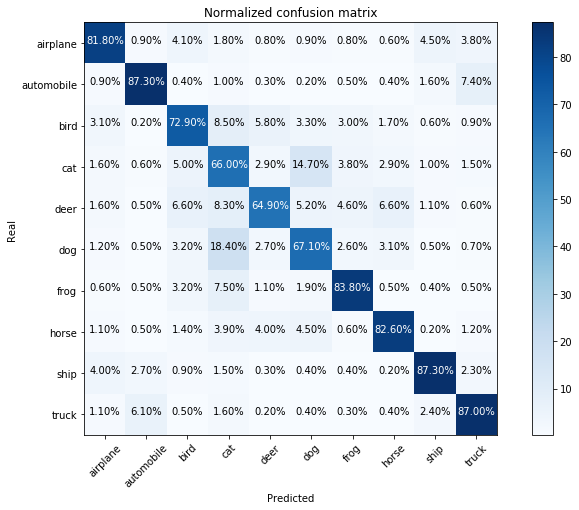

In [4]:
if __name__ == "__main__":
  name = 'data1'
  
  params = Hyperparameters()
  params.num_epochs = 30
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-3
  params.cut_layer = CUT_LAYER
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

In [5]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1
accuracy,78.07
batch_size,128
bottleneck,True
check_points_path,./tensorboard/cifar10_vgg16/exe_3/data1
cm,NaN
cut_layer,pool3
data_augmentation,True
decay_rate,0.98
decay_steps,1000
elapsed_time,251.589


In [6]:
  df.loc[['accuracy', 'f1_score', 'precision', 'recall']]

,data1
accuracy,78.07
f1_score,78.1539
precision,78.4687
recall,78.07
